In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


# Analise da influência nas vendas do Walmart

In [ ]:
#Puxando o arquivo para exploração
df=pd.read_csv("\Walmart_Sales\walmart_sales\Walmart_Sales.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


## Fazendo a exploração inicial

In [3]:
#Verificando as informações do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
#Verificando as informações do DF
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
#Convertendo data para tipo data
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [6]:
#Verificando se a numeros nulos
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
#Verificando se a numeros duplicados
df.duplicated().sum()

np.int64(0)

### Verificando a distribuição de vendas

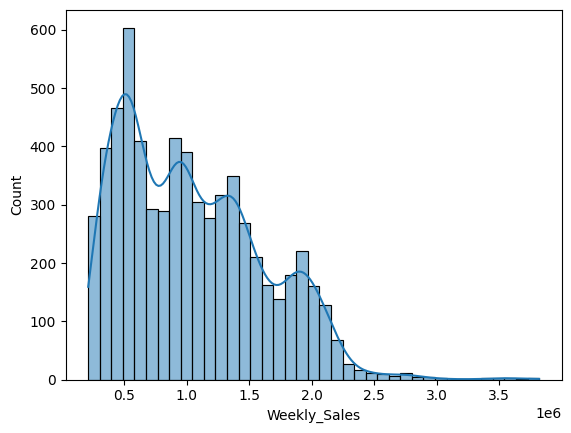

In [8]:
#Criando um histograma sobre as vendas semanais
sns.histplot(df['Weekly_Sales'], kde=True)  
plt.show()

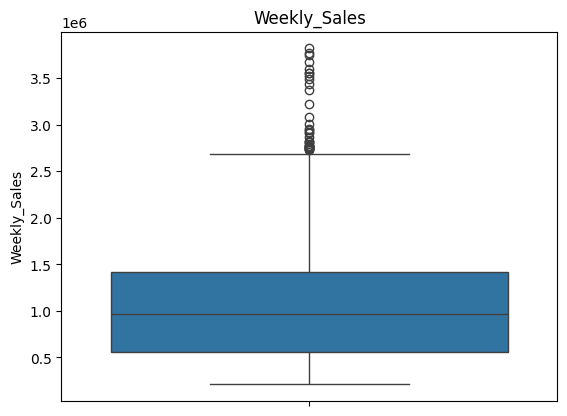

In [9]:
#Criando um boxplot para vermos valores discrepantes

sns.boxplot(y=df['Weekly_Sales'])
plt.title('Weekly_Sales')
plt.show()

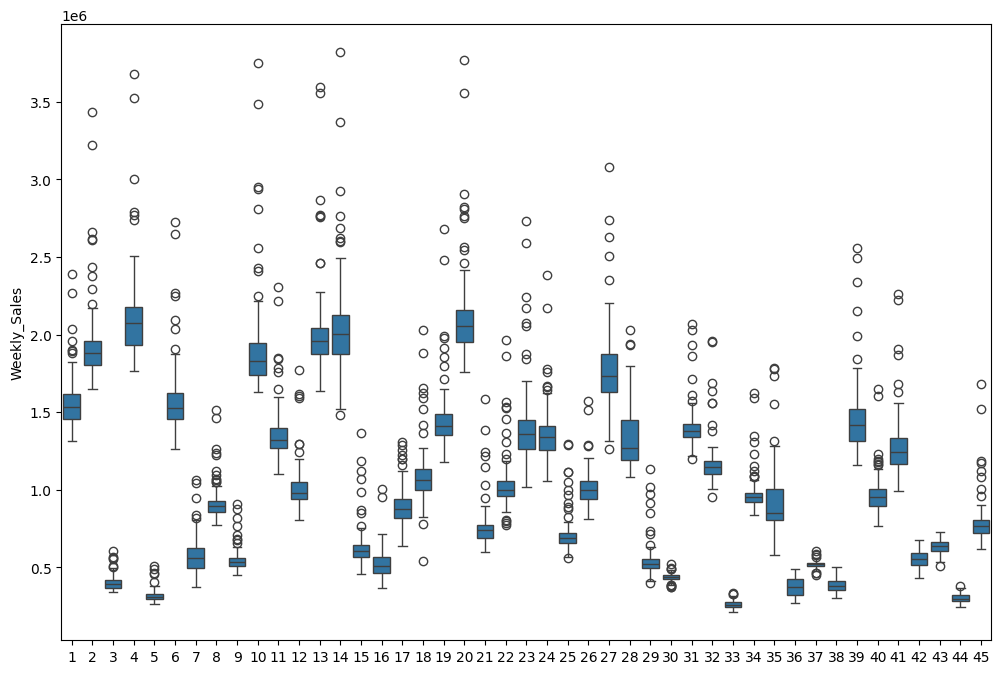

In [10]:
#Vendo os valores discrepantes por lojas
plt.figure(figsize = (12, 8))

sns.boxplot(x='Store', y='Weekly_Sales', data=df)
plt.xlabel("")
plt.show()

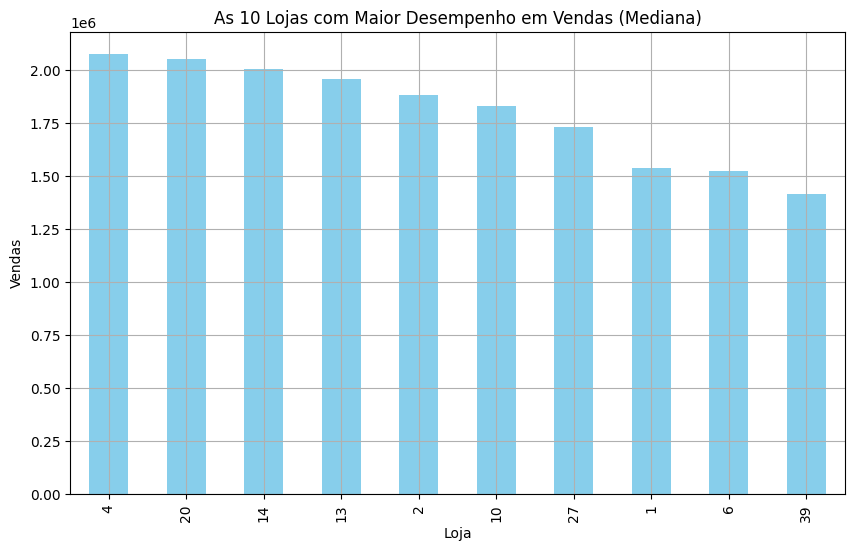

In [11]:
#Agrupando lojas por mediana de vendas semanais, pois é menos sucetivel aos outliers
vendas_por_loja = df.groupby('Store')['Weekly_Sales'].median()

# Exibindo as 10 lojas com maior mediana de vendas
vendas_por_loja.nlargest(10).plot(kind='bar', color='skyblue', figsize=(10, 6), title='As 10 Lojas com Maior Desempenho em Vendas (Mediana)')
plt.xlabel('Loja')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()

In [12]:
#Criando uma coluna com dia, mês e ano

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [13]:
#Verificando novamente após a alteração
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Day           6435 non-null   int32         
 9   Month         6435 non-null   int32         
 10  Year          6435 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(2)
memory usage: 477.7 KB


In [14]:
#Verificando quantos meses possuimos por ano (realizado para confirmar se possuimos todos os meses do ano)
meses_ano = df.groupby('Year')['Month'].nunique()
meses_ano


Year
2010    11
2011    12
2012    10
Name: Month, dtype: int64

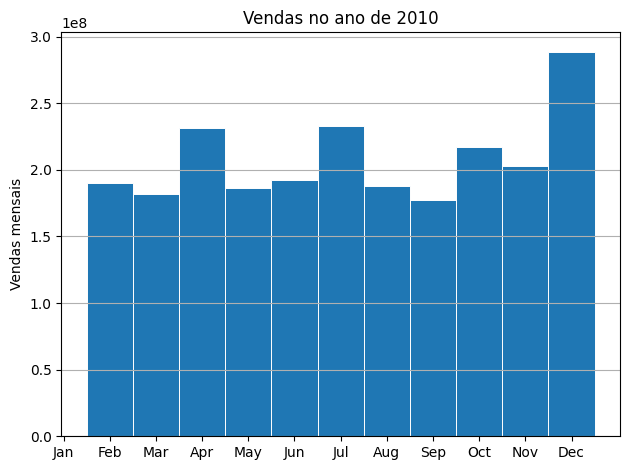

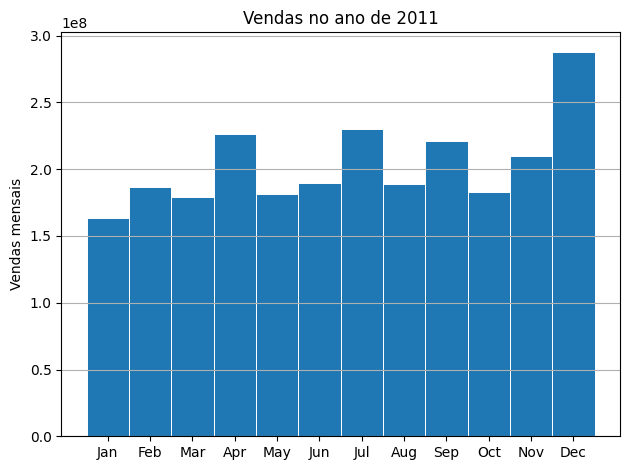

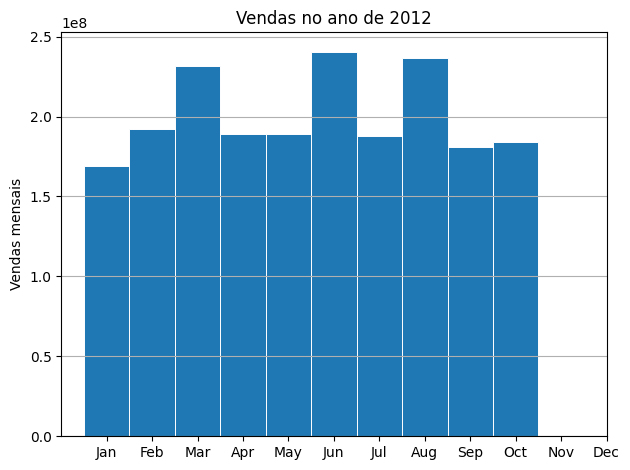

In [15]:
#Vendas mensais por ano

vendas_por_mes_ano = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()
for i in (2010,2011,2012):
    vendas_mes_ano = vendas_por_mes_ano[vendas_por_mes_ano['Year'] == i]
    x = vendas_mes_ano['Month']         
    y = vendas_mes_ano['Weekly_Sales']  

    fig, ax = plt.subplots()

    ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

    plt.title(f"Vendas no ano de {i}")
    plt.ylabel("Vendas mensais")
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(axis='y')

    plt.tight_layout()
    plt.show()


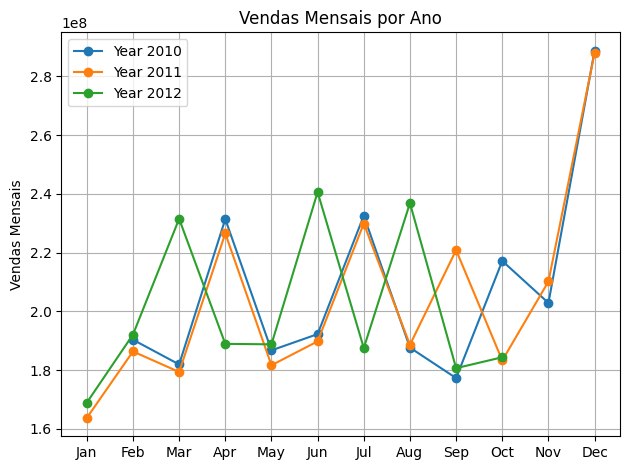

In [16]:
#Verificando as vendas mensais por ano usando grafico de linha

for ano in vendas_por_mes_ano['Year'].unique():
    vendas_ano = vendas_por_mes_ano[vendas_por_mes_ano['Year'] == ano]
    plt.plot(vendas_ano['Month'], vendas_ano['Weekly_Sales'],label=f'Year {ano}', marker='o')


plt.title('Vendas Mensais por Ano')
plt.ylabel('Vendas Mensais')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Analise de Outliers

In [17]:
#Capturando as informações sobre os quartis

print(f'\nQuartis da variavel: Weekly_Sales \n')
primeiro_quartil = df['Weekly_Sales'].quantile(0.25)
print(f'Primeiro quartil: {primeiro_quartil}')
segundo_quartil = df['Weekly_Sales'].quantile(0.5)
print(f'Segundo quartil: {segundo_quartil}')
terceiro_quartil = df['Weekly_Sales'].quantile(0.75)
print(f'Terceiro quartil: {terceiro_quartil}')
    
iqr = terceiro_quartil - primeiro_quartil

inferiores = primeiro_quartil - 1.5 * iqr
print(f'Limite inferior: {inferiores}')
superiores = terceiro_quartil + 1.5 * iqr
print(f'Limite superior: {superiores}')


Quartis da variavel: Weekly_Sales 

Primeiro quartil: 553350.105
Segundo quartil: 960746.04
Terceiro quartil: 1420158.66
Limite inferior: -746862.7275
Limite superior: 2720371.4924999997


In [18]:
#Vendo as lojas que estão acima do limite superior
#Com base nisso notamos que os valores discrepantes se encontram mais proximo ao final do ano
maiores_vendas = df[df['Weekly_Sales'] > 2720371]
maiores_vendas.sort_values(by='Weekly_Sales',ascending=False)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724,24,12,2010
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484,24,12,2010
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003,24,12,2010
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143,23,12,2011
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795,24,12,2010
1814,13,2011-12-23,3556766.03,0,24.76,3.186,129.984548,6.392,23,12,2011
2815,20,2011-12-23,3555371.03,0,40.19,3.389,212.236040,7.082,23,12,2011
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127,24,12,2010
1385,10,2011-12-23,3487986.89,0,48.36,3.541,129.984548,7.874,23,12,2011
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163,24,12,2010


In [19]:
#Analisando os meses das vendas acima
maiores_vendas[['Month','Year']].value_counts()

Month  Year
12     2010    15
       2011    10
11     2010     5
       2011     4
Name: count, dtype: int64

In [20]:
#Analisando quando ocorreu as maiores vendas por lojas
maiores_vendas_lojas = df.loc[df.groupby('Store')['Weekly_Sales'].idxmax()]
maiores_vendas_lojas


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
46,1,2010-12-24,2387950.20,0,52.33,2.886,211.405122,7.838,24,12,2010
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163,24,12,2010
332,3,2010-12-24,605990.41,0,57.16,2.886,214.701783,7.564,24,12,2010
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143,23,12,2011
666,5,2011-11-25,507900.07,1,61.93,3.236,219.042820,6.300,25,11,2011
761,6,2010-12-24,2727575.18,0,55.07,2.886,212.916508,7.007,24,12,2010
956,7,2011-12-23,1059715.27,0,12.19,3.173,196.171389,8.513,23,12,2011
1047,8,2010-12-24,1511641.09,0,45.67,2.886,214.747907,6.433,24,12,2010
1242,9,2011-12-23,905324.68,0,44.43,3.112,223.066113,6.054,23,12,2011
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003,24,12,2010


In [21]:
#Analisando os meses das maiores vendas por lojas
maiores_vendas_lojas[['Month','Year']].value_counts()

Month  Year
12     2010    30
       2011     8
5      2010     2
2      2012     1
9      2010     1
4      2012     1
11     2011     1
       2010     1
Name: count, dtype: int64

### Iniciando a pesquisa de correlação

In [22]:
#Verificando a correlação entre as variaveis
df_corr = df[[col for col in df.columns if col not in ['Store','Date','Day','Month','Year']]]
df_corr

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1643690.90,0,42.31,2.572,211.096358,8.106
1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1611968.17,0,39.93,2.514,211.289143,8.106
3,1409727.59,0,46.63,2.561,211.319643,8.106
4,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...
6430,713173.95,0,64.88,3.997,192.013558,8.684
6431,733455.07,0,64.89,3.985,192.170412,8.667
6432,734464.36,0,54.47,4.000,192.327265,8.667
6433,718125.53,0,56.47,3.969,192.330854,8.667


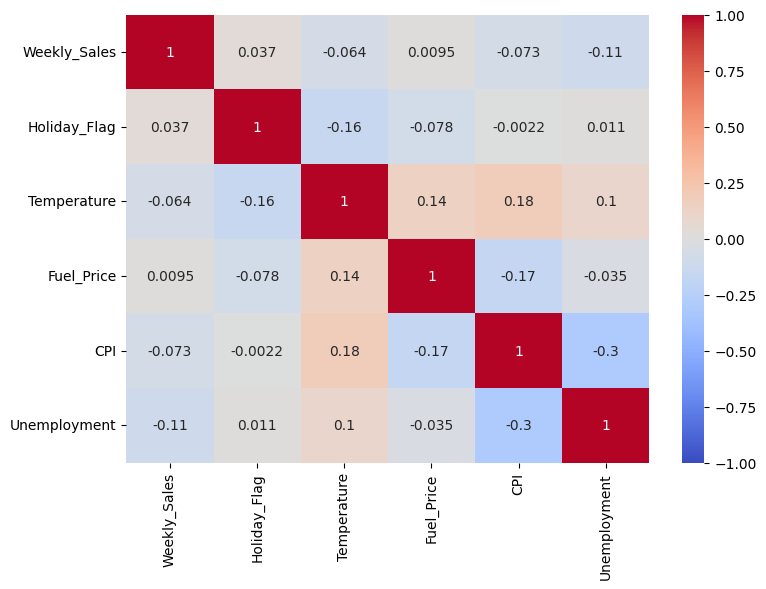

In [23]:
#Criando um mapa de calor
plt.figure(figsize = (8, 6))

sns.heatmap(df_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

plt.tight_layout()
plt.show()


## Análise de impacto do feriado nas vendas

- Como não foi identificado uma forte correlação, será feito uma análise mais profunda

In [24]:
#Separando as vendas com feriado
vendas_feriado = df[df['Holiday_Flag'] == 1]
vendas_nao_feriado = df[df['Holiday_Flag'] == 0] 



### Realizando o teste de hipotese

In [25]:
# Foi escolhido o teste Mann-Whitney U, pois é bom no trabalho com dados assimetricos e independentes 
from scipy.stats import mannwhitneyu

estatistica, p_valor = mannwhitneyu(vendas_feriado['Weekly_Sales'], vendas_nao_feriado['Weekly_Sales'], alternative = 'two-sided')

print(f"Estatística U: {estatistica}")
print(f"Valor-p: {p_valor}")

if p_valor < 0.05:
    print("Existe uma diferença significativa nas vendas entre as semanas com e sem feriado.")
else:
    print("Não há diferença significativa nas vendas entre as semanas com e sem feriado.")


Estatística U: 1431297.0
Valor-p: 0.02589203255601349
Existe uma diferença significativa nas vendas entre as semanas com e sem feriado.


### Validando o teste de hipotese

In [26]:
#Calculando a diferença entre as medianas com e sem feriado

mediana_f = vendas_feriado['Weekly_Sales'].median()
mediana_sf = vendas_nao_feriado['Weekly_Sales'].median()
dif = mediana_f - mediana_sf

print(f'Mediana vendas com feriado: {round(mediana_f, 2)}')
print(f'Mediana vendas sem feriado: {round(mediana_sf, 2)}')
print(f'Diferença: R${round(dif,2)}')


Mediana vendas com feriado: 1018538.04
Mediana vendas sem feriado: 956211.2
Diferença: R$62326.84


In [27]:
#Calculando a porcentagem da diferença

porcentagem = (dif/mediana_sf) * 100
print(f'Porcentagem: {round(porcentagem, 2)}% ')

Porcentagem: 6.52% 


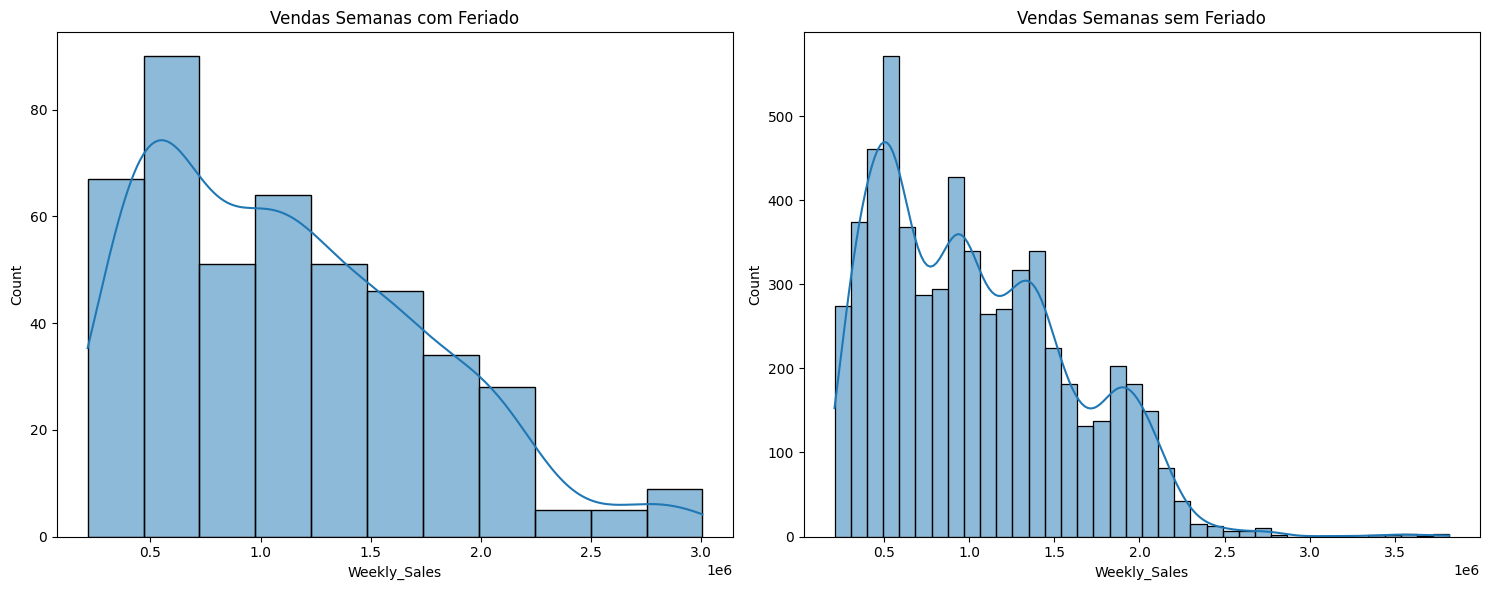

In [28]:
# Comparação no histograma
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(vendas_feriado['Weekly_Sales'], kde=True, ax=axes[0])
axes[0].set_title("Vendas Semanas com Feriado")

sns.histplot(vendas_nao_feriado['Weekly_Sales'], kde=True,ax=axes[1])
axes[1].set_title("Vendas Semanas sem Feriado")

plt.tight_layout()
plt.show()

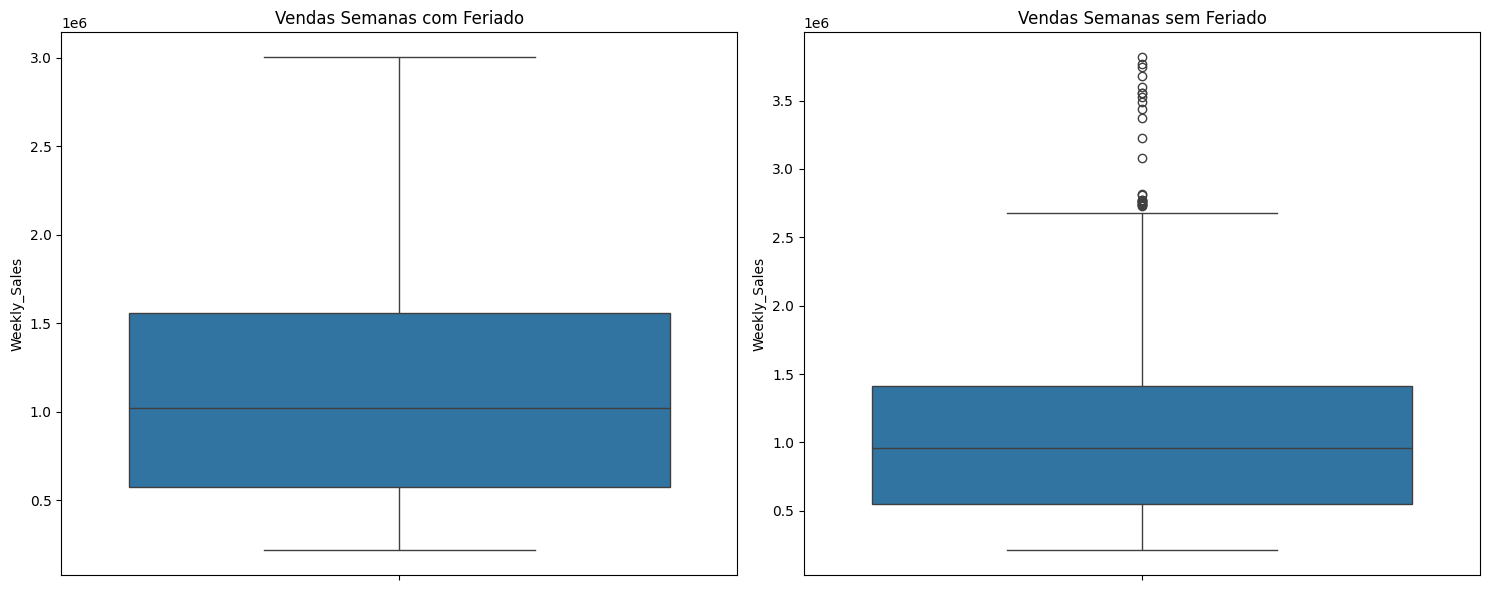

In [29]:
#Comparação no Boxplot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(y=vendas_feriado['Weekly_Sales'], ax=axes[0])
axes[0].set_title("Vendas Semanas com Feriado")

sns.boxplot(y=vendas_nao_feriado['Weekly_Sales'], ax=axes[1])
axes[1].set_title("Vendas Semanas sem Feriado")

plt.tight_layout()
plt.show()

### Algumas confirmações até aqui:

 - Valores discrepantes tendem a ocorrer com maior frequência no final do ano, especialmente em dezembro;
 - Observa-se uma diferença significativa nas vendas, mesmo considerando o maior número de semanas sem feriados no período analisado;
 - Notamos que os outliers aparecem, majoritariamente, em semanas sem feriado — o que pode parecer contraditório, já que as vendas costumam aumentar durante os feriados;
 - A diferença nas vendas  é de R$ 62.326,84, ou 6,52%. Para algumas empresas, esse valor é interessante de se trabalhar, além de reforçar que os feriados influenciam positivamente as vendas;

## Análise sem o mês de dezembro


- Essa análise será feita para validarmos o teste de hipotese sem os valores discrepantes

In [30]:
#Separando as vendas e removendo dezembro

vendas_feriado_dif = df[(df['Holiday_Flag'] == 1) & (~df['Month'].isin([12]))]
vendas_nao_feriado_dif = df[(df['Holiday_Flag'] == 0) & (~df['Month'].isin([12]))]

In [31]:
# Realizando o teste de Mann-Whitney U
estatistica, p_valor = mannwhitneyu(vendas_feriado_dif['Weekly_Sales'], vendas_nao_feriado_dif['Weekly_Sales'], alternative = 'two-sided')


print(f"Estatística U: {estatistica}")
print(f"Valor-p: {p_valor}")


if p_valor < 0.05:
    print("Existe uma diferença significativa nas vendas entre as semanas com e sem feriado.")
else:
    print("Não há diferença significativa nas vendas entre as semanas com e sem feriado.")


Estatística U: 1124732.0
Valor-p: 0.0004136507928237253
Existe uma diferença significativa nas vendas entre as semanas com e sem feriado.


In [32]:
mediana_f_dif = vendas_feriado_dif['Weekly_Sales'].median()
mediana_sf_dif = vendas_nao_feriado_dif['Weekly_Sales'].median()
dif = mediana_f_dif - mediana_sf_dif

print(f'Mediana vendas com feriado: {round(mediana_f_dif, 2)}')
print(f'Mediana vendas sem feriado: {round(mediana_sf_dif, 2)}')
print(f'Diferença: R${round(dif,2)}')


Mediana vendas com feriado: 1078330.99
Mediana vendas sem feriado: 945643.17
Diferença: R$132687.82


In [33]:
#Calculando a porcentagem da diferença

porcentagem = (dif/mediana_sf_dif) * 100
print(f'Porcentagem: {round(porcentagem,2)}% ')



Porcentagem: 14.03% 


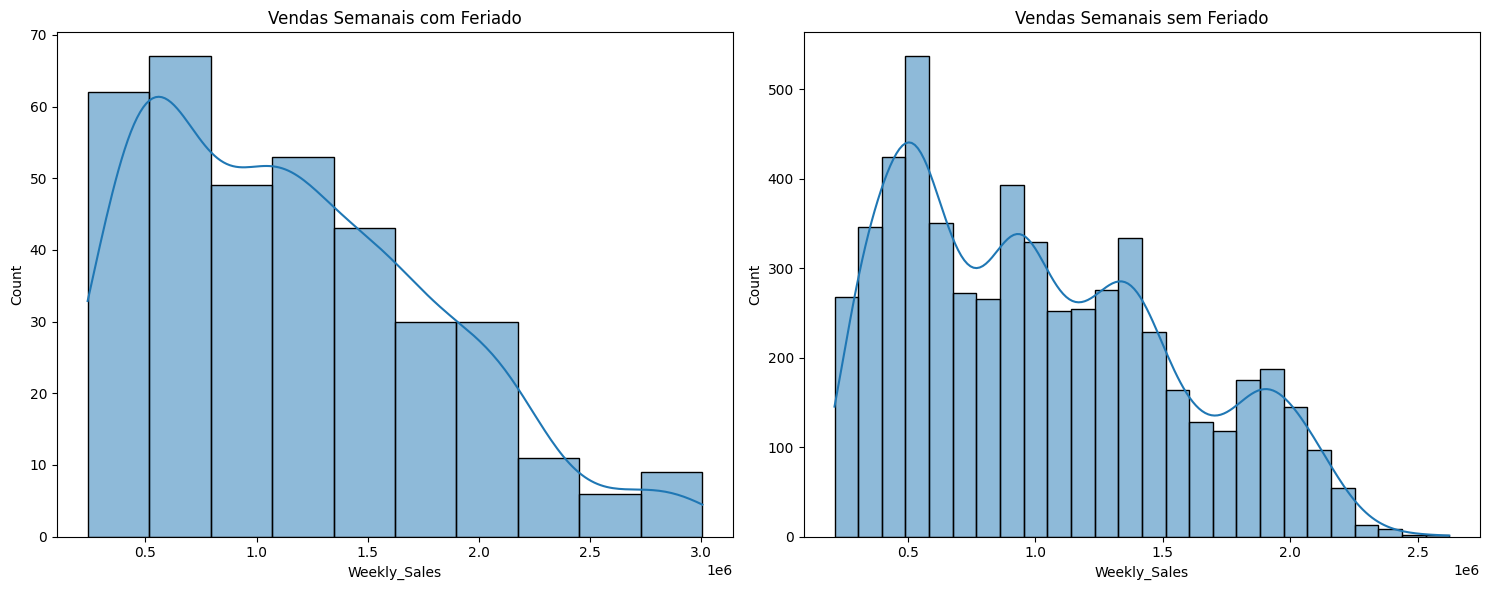

In [34]:
# Histograma dos dados vendas com feriado
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(vendas_feriado_dif['Weekly_Sales'], kde=True, ax=axes[0])
axes[0].set_title("Vendas Semanais com Feriado")

sns.histplot(vendas_nao_feriado_dif['Weekly_Sales'], kde=True,ax=axes[1])
axes[1].set_title("Vendas Semanais sem Feriado")

plt.tight_layout()
plt.show()


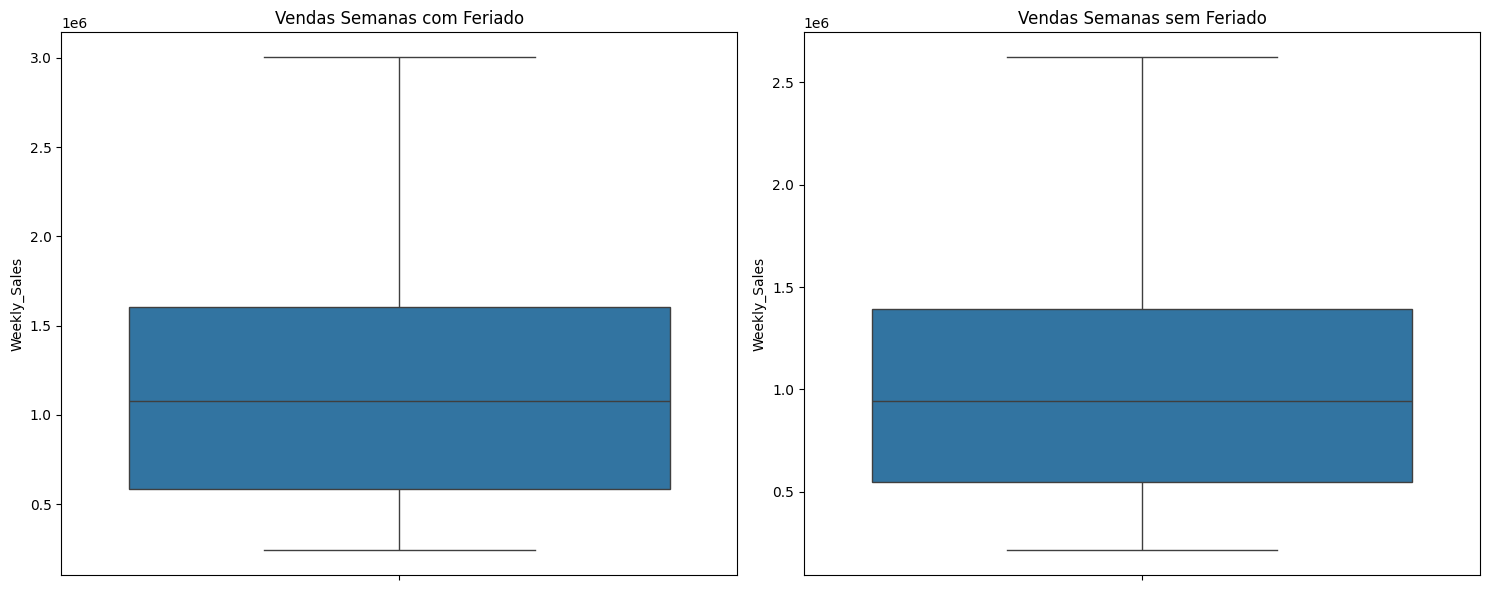

In [35]:
#Boxplot dos dados vendas com feriados
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(y=vendas_feriado_dif['Weekly_Sales'], ax=axes[0])
axes[0].set_title("Vendas Semanas com Feriado")

sns.boxplot(y=vendas_nao_feriado_dif['Weekly_Sales'], ax=axes[1])
axes[1].set_title("Vendas Semanas sem Feriado")

plt.tight_layout()
plt.show()

### Algumas novas informações:

 - Ao remover o mês de dezembro da análise, os valores discrepantes desaparecem do boxplot, confirmando que este mês concentra os outliers;
 - A distribuição de vendas, sem dezembro, mantém um padrão semelhante ao da análise anterior;
 - Com a exclusão de dezembro, a diferença nas vendas salta para R$ 132.687,82, ou 14,03%, indicando uma influência ainda mais clara dos feriados;
 - É interessante analisar dezembro separadamente, pois, ao contrário do esperado, observamos um aumento nas vendas em semanas classificadas como "sem feriado";

## Analise de vendas em dezembro

- A ideia é entender o comportamento das vendas em dezembro

In [36]:
#Fazendo a analise de Dezembro, levando em questão suas peculiaridades.

df_dez = df[df['Month'] == 12]
df_dez

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
43,1,2010-12-03,1548033.78,0,49.27,2.708,211.607193,7.838,3,12,2010
44,1,2010-12-10,1682614.26,0,46.33,2.843,211.465953,7.838,10,12,2010
45,1,2010-12-17,1891034.93,0,49.84,2.869,211.405312,7.838,17,12,2010
46,1,2010-12-24,2387950.20,0,52.33,2.886,211.405122,7.838,24,12,2010
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,31,12,2010
...,...,...,...,...,...,...,...,...,...,...,...
6387,45,2011-12-02,875699.81,0,50.19,3.452,188.502435,8.523,2,12,2011
6388,45,2011-12-09,957155.31,0,46.57,3.415,188.654469,8.523,9,12,2011
6389,45,2011-12-16,1078905.68,0,39.93,3.413,188.797935,8.523,16,12,2011
6390,45,2011-12-23,1521957.99,0,42.27,3.389,188.929975,8.523,23,12,2011


In [37]:
#Separando os dados de dezembro
df_dez_f = df_dez[df_dez['Holiday_Flag'] == 1]
df_dez_sf = df_dez[df_dez['Holiday_Flag'] == 0]

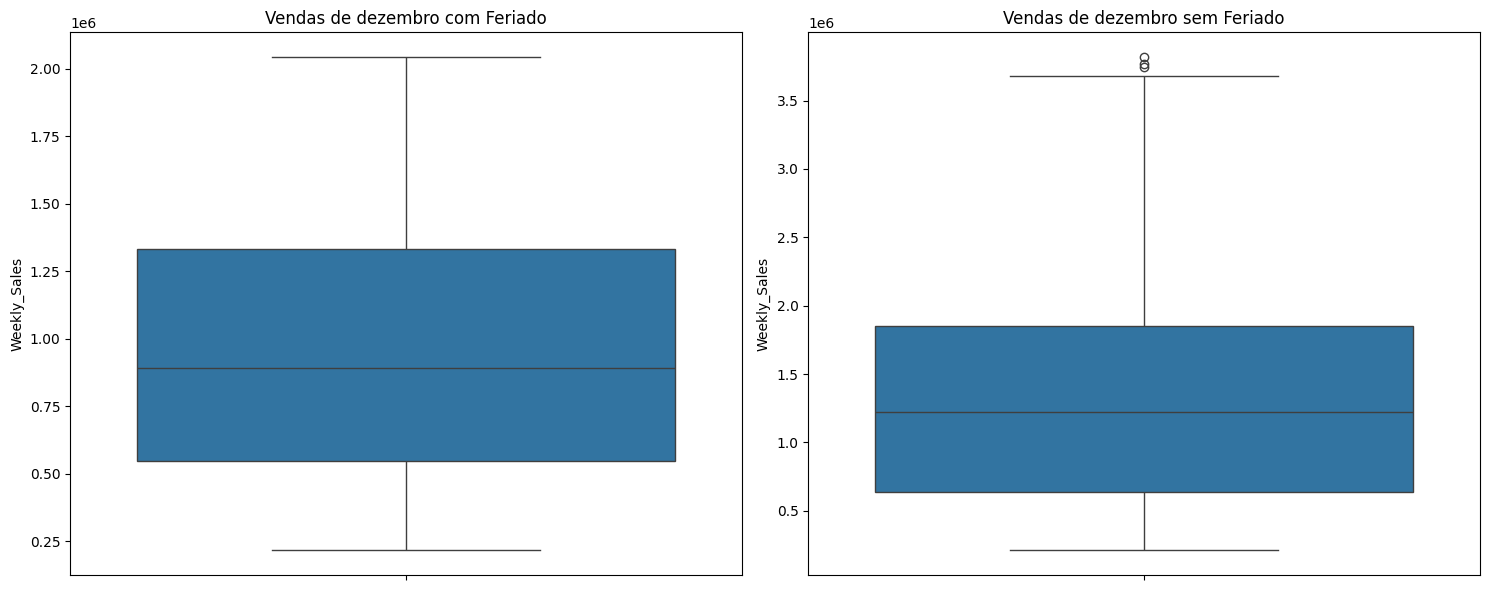

In [38]:
#Verificando os outliers no boxplot

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(y=df_dez_f['Weekly_Sales'], ax=axes[0])
axes[0].set_title("Vendas de dezembro com Feriado")

sns.boxplot(y=df_dez_sf['Weekly_Sales'], ax=axes[1])
axes[1].set_title("Vendas de dezembro sem Feriado")

plt.tight_layout()
plt.show()

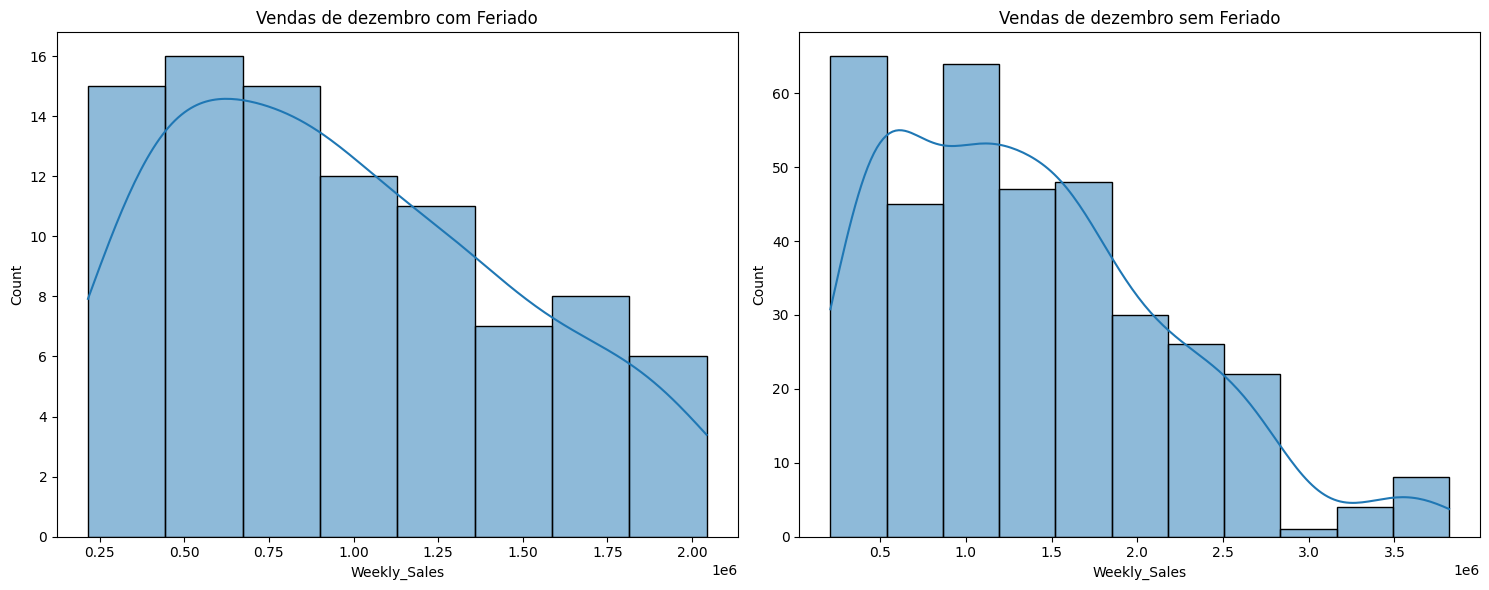

In [39]:
#Analisando a distribuição de vendas com histograma
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df_dez_f['Weekly_Sales'], kde=True, ax=axes[0])
axes[0].set_title("Vendas de dezembro com Feriado")

sns.histplot(df_dez_sf['Weekly_Sales'], kde=True,ax=axes[1])
axes[1].set_title("Vendas de dezembro sem Feriado")

plt.tight_layout()
plt.show()


In [40]:
#Verificando as datas das maiores vendas de dezembro por loja
maiores_vendas_lojas_dez = df_dez.loc[df_dez.groupby('Store')['Weekly_Sales'].idxmax()]
maiores_vendas_lojas_dez.head(15)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
46,1,2010-12-24,2387950.20,0,52.33,2.886,211.405122,7.838,24,12,2010
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163,24,12,2010
332,3,2010-12-24,605990.41,0,57.16,2.886,214.701783,7.564,24,12,2010
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143,23,12,2011
618,5,2010-12-24,466010.25,0,55.01,2.886,211.957398,6.768,24,12,2010
761,6,2010-12-24,2727575.18,0,55.07,2.886,212.916508,7.007,24,12,2010
956,7,2011-12-23,1059715.27,0,12.19,3.173,196.171389,8.513,23,12,2011
1047,8,2010-12-24,1511641.09,0,45.67,2.886,214.747907,6.433,24,12,2010
1242,9,2011-12-23,905324.68,0,44.43,3.112,223.066113,6.054,23,12,2011
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003,24,12,2010


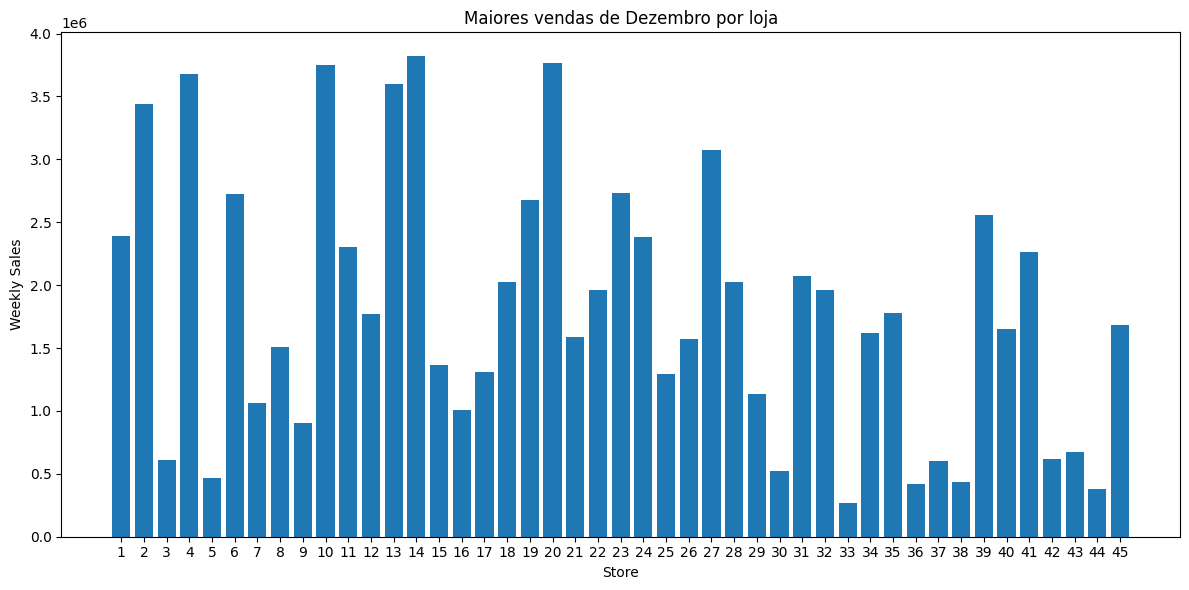

In [41]:
#Criando um grafico de barra com as vendas

plt.figure(figsize=(12, 6))

plt.bar(maiores_vendas_lojas_dez['Store'],maiores_vendas_lojas_dez['Weekly_Sales'])
plt.title('Maiores vendas de Dezembro por loja')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')

plt.xticks(maiores_vendas_lojas_dez['Store'])

plt.tight_layout()
plt.show()

In [42]:
data_vendas_dez = maiores_vendas_lojas_dez['Date'].value_counts().reset_index()
data_vendas_dez


,Date,count
0,2010-12-24,33
1,2011-12-23,9
2,2011-12-09,3


### Atuais conclusões:

 - O gráfico de correlação mostra que as vendas não têm relação forte com outras variáveis analisadas;
 - Os feriados de dezembro são, de fato, os períodos com maior volume de vendas;
 - Notamos picos expressivos de vendas na semana anterior ao Natal. Mesmo quando essa semana não está marcada como feriado, é evidente a antecipação das compras;
 - Curiosamente, as vendas na semana com feriado (geralmente no final do ano) são menores do que na semana anterior ao Natal, reforçando a ideia de concentração das compras antecipadas;
 - Com base no teste de hipótese, concluímos que os feriados influenciam significativamente as vendas — e essa influência se intensifica quando dezembro é excluído da análise;


---------------------------------------------------------------------------------